In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
print(data.head())
print(data.info())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
print(data['Attrition'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [6]:
data = pd.get_dummies(data, drop_first=True)

In [7]:
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

In [8]:
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (1470, 47)
Shape of y (target): (1470,)


In [9]:
print("\nFirst few rows of X (features):")
print(X.head())


First few rows of X (features):
   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Laboratory Technician  JobRole

In [10]:
print("\nFirst few values of y (target):")
print(y.head())


First few values of y (target):
0     True
1    False
2     True
3    False
4    False
Name: Attrition_Yes, dtype: bool


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print("Mean of X_train after scaling:", np.mean(X_train, axis=0))
print("Standard deviation of X_train after scaling:", np.std(X_train, axis=0))

print("Mean of X_test after scaling:", np.mean(X_test, axis=0))
print("Standard deviation of X_test after scaling:", np.std(X_test, axis=0))


Mean of X_train after scaling: [-1.45008722e-16 -1.26882631e-16  9.06304510e-17 -4.68257330e-17
  0.00000000e+00  1.52561259e-16  5.58887781e-17 -1.78239887e-16
 -2.48478486e-16  1.45008722e-16 -2.14492067e-16  7.85463909e-17
 -6.49518232e-17 -5.43782706e-17  7.55253758e-17 -4.15389567e-16
 -1.51050752e-17  0.00000000e+00  1.66155827e-17  6.34413157e-17
 -1.89568693e-16 -6.04203007e-18  1.51050752e-18  7.85463909e-17
 -3.92731954e-17 -1.96365977e-17 -3.02101503e-18  3.62521804e-17
  6.64623307e-17  1.29903646e-16  3.02101503e-17  6.64623307e-17
  1.51050752e-17 -2.41681203e-17  4.83362405e-17  2.34128665e-17
  1.51050752e-18 -1.20840601e-17 -1.20840601e-17  1.05735526e-17
  5.43782706e-17 -1.20840601e-17  3.02101503e-17 -5.73992856e-17
 -4.38047180e-17  6.04203007e-17 -9.06304510e-18]
Standard deviation of X_train after scaling: [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of X_test 

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8775510204081632
Confusion Matrix:
 [[254   1]
 [ 35   4]]
Classification Report:
               precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



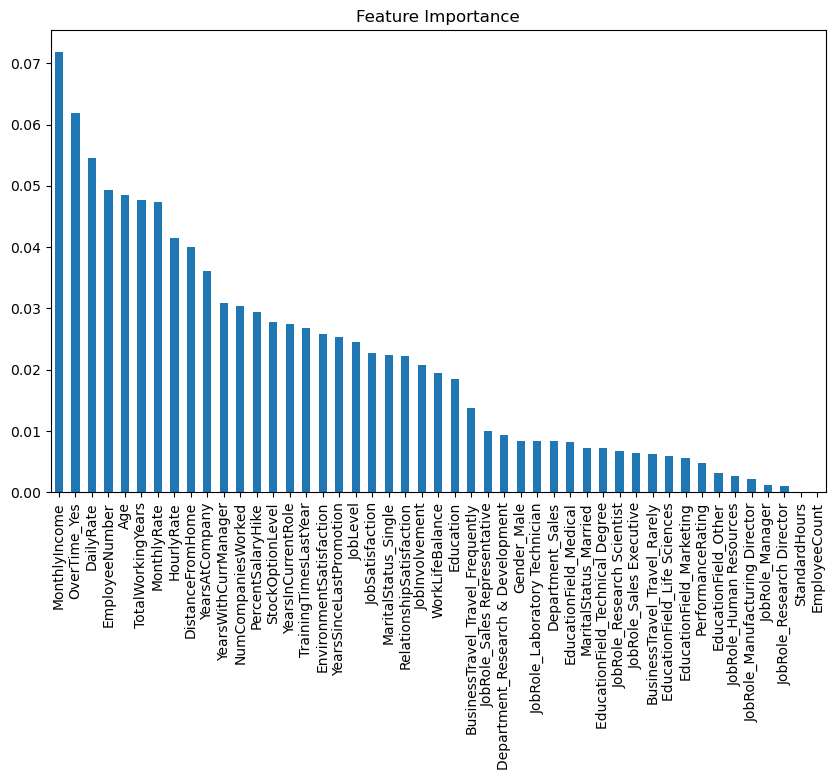

In [17]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [18]:
# Get probabilities of each employee leaving
probabilities = model.predict_proba(X_test)

# Probability of attrition (class 1, 'Yes') for each employee
attrition_prob = probabilities[:, 1]  # Only get probabilities for the "Yes" class (index 1)

# Add this probability to a DataFrame to inspect which employees are likely to leave
results = pd.DataFrame({'Attrition_Probability': attrition_prob, 'Predicted_Attrition': y_pred})
results['Actual_Attrition'] = y_test.values

# Preview the results
print(results.head())


   Attrition_Probability  Predicted_Attrition  Actual_Attrition
0                   0.18                False             False
1                   0.06                False             False
2                   0.39                False              True
3                   0.07                False             False
4                   0.08                False             False


In [19]:
# Set a threshold (e.g., 0.5) for employees likely to leave
threshold = 0.5
results['Likely_to_Leave'] = results['Attrition_Probability'] >= threshold

# Filter employees with a high probability of leaving
likely_to_leave = results[results['Likely_to_Leave']]

print("Employees likely to leave:")
print(likely_to_leave)


Employees likely to leave:
     Attrition_Probability  Predicted_Attrition  Actual_Attrition  \
44                    0.61                 True              True   
49                    0.66                 True              True   
61                    0.58                 True              True   
125                   0.52                 True              True   
131                   0.51                 True             False   

     Likely_to_Leave  
44              True  
49              True  
61              True  
125             True  
131             True  


In [40]:
new_data = pd.read_csv('newdata.csv')

In [42]:
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

In [44]:
missing_cols = set(X.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0
new_data_encoded = new_data_encoded[X.columns]

In [46]:
new_data_scaled = scaler.transform(new_data_encoded)

In [48]:
attrition_probabilities = model.predict_proba(new_data_scaled)[:, 1]  # Probability of attrition
attrition_predictions = model.predict(new_data_scaled)  # Predicted class (0 = No, 1 = Yes)

In [50]:
new_data['Attrition_Probability'] = attrition_probabilities
new_data['Predicted_Attrition'] = attrition_predictions


In [52]:
##print(new_data.head())

   Age  Unnamed: 1     BusinessTravel  DailyRate              Department  \
0   41         NaN      Travel_Rarely       1102                   Sales   
1   49         NaN  Travel_Frequently        279  Research & Development   
2   37         NaN      Travel_Rarely       1373  Research & Development   
3   33         NaN  Travel_Frequently       1392  Research & Development   
4   27         NaN      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  StockOptionLevel TotalWorkingYears  TrainingTimesLastY

In [54]:
age_with_predictions = new_data[['Age', 'Predicted_Attrition']]
print(age_with_predictions)

      Age  Predicted_Attrition
0      41                 True
1      49                False
2      37                 True
3      33                False
4      27                False
...   ...                  ...
1465   36                False
1466   39                False
1467   27                False
1468   49                False
1469   34                False

[1470 rows x 2 columns]


In [58]:
##instead of displaying true or false value for attrition we can display a percentage probabilty of attrition
new_data['Attrition_Percentage'] = new_data['Attrition_Probability'] * 100

In [60]:
age_with_percentage = new_data[['Age', 'Attrition_Percentage']]
print(age_with_percentage)

      Age  Attrition_Percentage
0      41                  74.0
1      49                   9.0
2      37                  81.0
3      33                  14.0
4      27                   6.0
...   ...                   ...
1465   36                   5.0
1466   39                   5.0
1467   27                  11.0
1468   49                  17.0
1469   34                   1.0

[1470 rows x 2 columns]
